<a href="https://colab.research.google.com/github/rubeshk007/credir_card_cnn/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the dataset
data=pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# check the shape of the dataset
data.shape

(31780, 31)

In [ ]:
# we will check if there are any null values in the dataset
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31780 entries, 0 to 31779
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    31780 non-null  int64  
 1   V1      31780 non-null  float64
 2   V2      31780 non-null  float64
 3   V3      31780 non-null  float64
 4   V4      31780 non-null  float64
 5   V5      31780 non-null  float64
 6   V6      31780 non-null  float64
 7   V7      31779 non-null  float64
 8   V8      31779 non-null  float64
 9   V9      31779 non-null  float64
 10  V10     31779 non-null  float64
 11  V11     31779 non-null  float64
 12  V12     31779 non-null  float64
 13  V13     31779 non-null  float64
 14  V14     31779 non-null  float64
 15  V15     31779 non-null  float64
 16  V16     31779 non-null  float64
 17  V17     31779 non-null  float64
 18  V18     31779 non-null  float64
 19  V19     31779 non-null  float64
 20  V20     31779 non-null  float64
 21  V21     31779 non-null  float64
 22

In [ ]:
data['Class'].value_counts()


,count
Class,
0.0,31677
1.0,102


In [ ]:
non_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]
non_fraud.shape, fraud.shape

((31677, 31), (102, 31))

In [ ]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(102, 31)

In [ ]:
data = pd.concat([fraud, non_fraud], ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,34834,-0.840200,0.522289,1.714787,0.122400,0.599441,0.209193,0.523717,0.337521,-0.442786,...,-0.100241,-0.432113,-0.166231,-0.376974,0.536037,-0.542984,-0.033755,-0.034688,29.37,0.0
200,31987,-1.356428,0.568504,1.678289,0.805600,-0.701383,-0.056497,0.251670,-0.185542,0.593986,...,0.145952,0.767911,-0.281662,0.433662,-0.393416,0.462935,-1.025459,-0.159849,59.90,0.0
201,2931,-0.415173,0.698465,1.217253,-2.106208,0.168621,-1.286534,1.104525,-0.333584,0.494769,...,0.130509,0.740011,-0.288407,0.553071,0.030370,-0.870996,0.238130,-0.020866,1.00,0.0
202,417,-0.791993,1.054007,-0.110012,-1.234186,2.751355,3.443064,0.055313,-0.105660,-0.306074,...,0.425088,-1.178829,-0.032154,0.928394,-0.128566,0.046299,0.069745,-0.037621,0.89,0.0


In [ ]:
data.Class.value_counts()

,count
Class,
1.0,102
0.0,102


In [ ]:
# now dividing the dataframe into dependent and independent varaible
X=data.drop(['Class'], axis=1)
y=data.Class

# check the shape
X.shape, y.shape

((204, 30), (204,))

In [ ]:
# we will divide the dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

# check the shape again
X_train.shape,X_test.shape,y_train.shape,y_test.shape
((787, 30), (197, 30), (787,), (197,))
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
134,3750,-1.142057,-1.245521,1.761191,-0.755150,0.865709,1.261541,-0.402450,0.345620,-0.342215,...,0.692625,0.145086,0.320004,0.611119,-1.101679,-0.773755,-0.407959,-0.063404,-0.085038,151.14
145,12385,1.265575,0.155405,0.504784,0.754226,-0.566713,-0.976779,-0.176903,-0.221160,1.636588,...,-0.216569,-0.081842,-0.001352,-0.069356,0.361122,0.444746,0.578199,-0.078931,0.000453,6.99
16,8415,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,...,0.632710,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1.00
54,21419,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,1.001519,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00
85,30852,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,...,-1.016923,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,104.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,26961,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99
168,31817,0.690420,-1.486340,1.661261,0.869129,-2.039019,0.478243,-1.080777,0.292985,2.075292,...,0.366772,0.166951,0.470744,-0.297157,0.537100,0.199442,1.228349,-0.025090,0.060491,240.00
185,35654,1.211791,0.128179,0.275335,0.600414,-0.528667,-0.804485,-0.180616,0.081075,0.139809,...,-0.224796,-0.263934,-0.916355,0.145651,0.222869,0.104375,0.085238,-0.042732,0.015416,1.79
35,13323,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00


In [ ]:
# scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train,y_train

(array([[-1.44528002,  0.32787312, -0.81162341, ..., -0.29881441,
         -0.37432656,  0.43642655],
        [-0.70288553,  0.65993745, -0.50471627, ..., -0.31279198,
         -0.22099469, -0.4123463 ],
        [-1.04420645,  0.45070413,  0.40622173, ...,  0.56037256,
          0.80543307, -0.44761615],
        ...,
        [ 1.29766773,  0.65251941, -0.51068067, ..., -0.28020566,
         -0.19415863, -0.44296453],
        [-0.62224094, -0.2668864 ,  1.27680155, ...,  1.17583778,
          1.22868365, -0.44761615],
        [-1.25132032,  0.4101278 , -1.17449059, ..., -0.49875475,
          0.03652587,  5.06955455]]),
 134    0.0
 145    0.0
 16     1.0
 54     1.0
 85     1.0
       ... 
 68     1.0
 168    0.0
 185    0.0
 35     1.0
 129    0.0
 Name: Class, Length: 163, dtype: float64)

In [ ]:
# @title
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train.shape

(163, 30)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# check the shape again
X_train.shape, X_test.shape

((163, 30, 1), (41, 30, 1))

In [ ]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout, Input

# import model
model=Sequential()
# layers
model.add(Input(shape=X_train[0].shape))  # Define input shape with Input layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 29, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 29, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 28, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1792)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         114,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,457 (466.63 KB)

 Trainable params: 119,265 (465.88 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the model
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6064 - loss: 4.9538 - val_accuracy: 0.7073 - val_loss: 1.3244
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8906 - loss: 1.3229 - val_accuracy: 0.7317 - val_loss: 2.6045
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9073 - loss: 1.2674 - val_accuracy: 0.7805 - val_loss: 2.5709
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9170 - loss: 1.3461 - val_accuracy: 0.8049 - val_loss: 2.4809
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9385 - loss: 0.8871 - val_accuracy: 0.8049 - val_loss: 2.4231
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9364 - loss: 1.0255 - val_accuracy: 0.8293 - val_loss: 2.0810
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9417 - loss: 0.7696 - val_accuracy: 0.8537 - val_loss: 2.0166
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9666 - loss: 0.5409 - val_accuracy: 0.8537 - val_loss: 1.6565


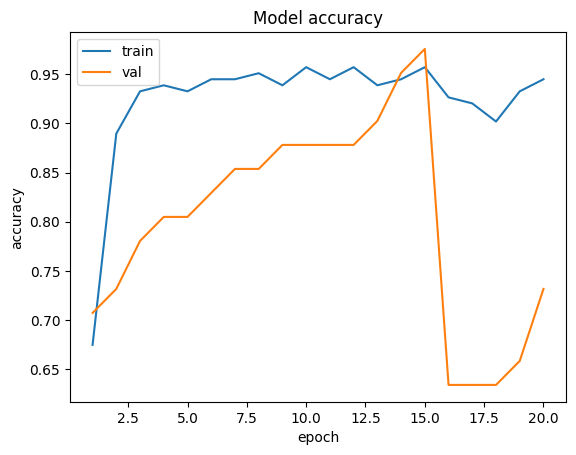

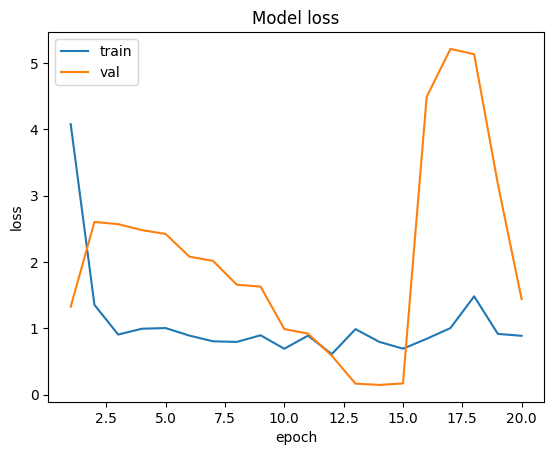

In [ ]:
# plot
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()
plot_learningcurve(history,20)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6890 - loss: 0.7527 - val_accuracy: 0.9492 - val_loss: 0.4648
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9315 - loss: 0.2343 - val_accuracy: 0.9661 - val_loss: 0.4226
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9911 - loss: 0.0436 - val_accuracy: 1.0000 - val_loss: 0.4096
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9751 - loss: 0.0986 - val_accuracy: 0.9492 - val_loss: 0.3945
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9802 - loss: 0.0702 - val_accuracy: 0.9661 - val_loss: 0.3564
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9492 - val_loss: 0.3362
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9759 - loss: 0.0642 - val_accuracy: 0.8983 - val_loss: 0.3339
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9810 - loss: 0.0486 - val_accuracy: 0.8305 - val_loss: 0.3306


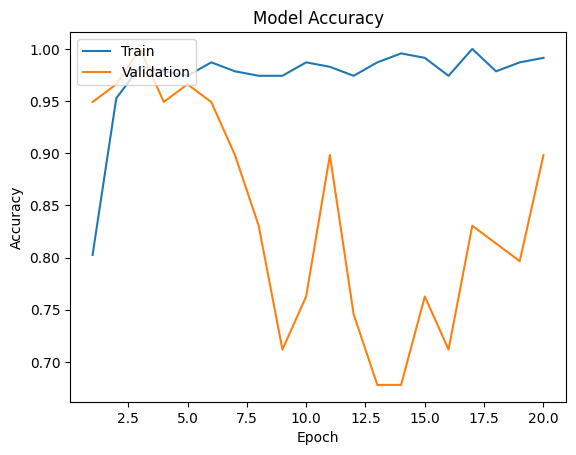

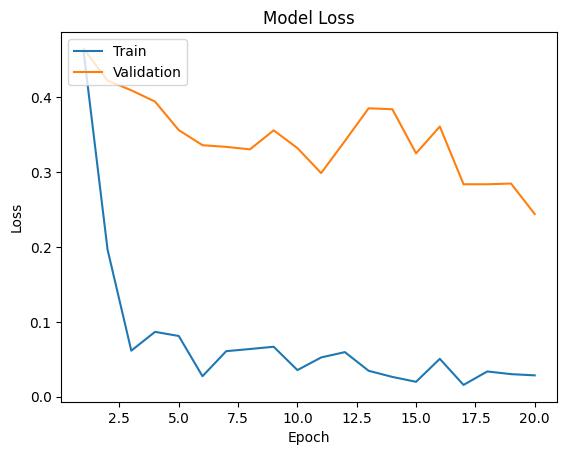

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Optimal Threshold: 0.8043
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%
ROC-AUC Score: 1.0000
Confusion Matrix:
[[24  0]
 [ 0 35]]


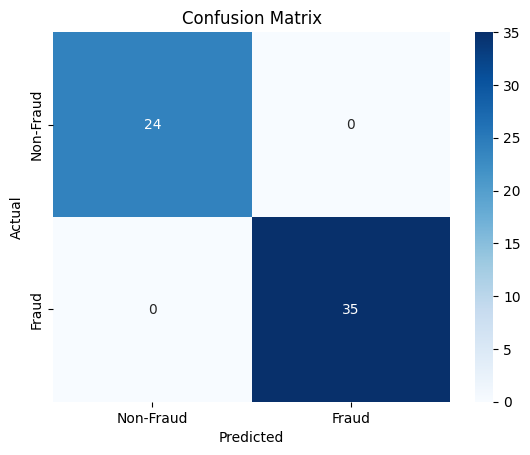

Optimal Threshold: 0.8043


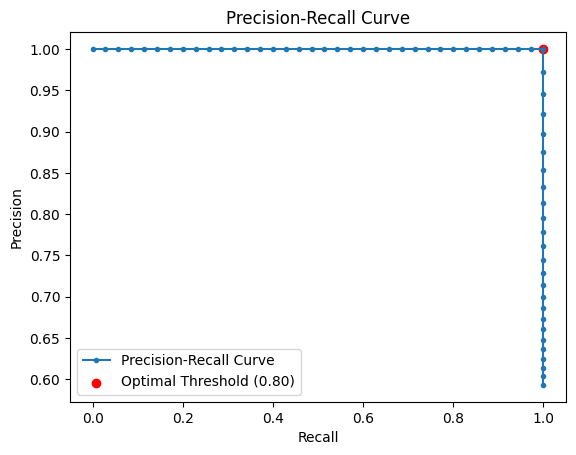

In [ ]:
non_fraud = data[data['Class'] == 0].sample(data[data['Class'] == 1].shape[0])
fraud = data[data['Class'] == 1]
data = pd.concat([fraud, non_fraud], ignore_index=True)

# Splitting features (X) and target (y)
X = data.drop(['Class'], axis=1)
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, BatchNormalization, Dropout, Input

model = Sequential([
    Input(shape=X_train[0].shape),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot learning curves
def plot_learningcurve(history, epochs):
    epochs_range = range(1, epochs + 1)
    # Accuracy plot
    plt.plot(epochs_range, history.history['accuracy'])
    plt.plot(epochs_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # Loss plot
    plt.plot(epochs_range, history.history['loss'])
    plt.plot(epochs_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Find the optimal threshold using Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold with the best F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Predict classes using the optimal threshold
y_pred_classes = (y_pred_prob >= optimal_threshold).astype(int)

# Evaluate the model using updated predictions
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred_classes)

# Print evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Find the optimal threshold using Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold with the best F1-score
optimal_idx = np.argmax(f1_scores)

# Ensure optimal_idx is valid and within bounds
if optimal_idx >= 0 and optimal_idx < len(precision):
    optimal_threshold = thresholds[optimal_idx]
    print(f"Optimal Threshold: {optimal_threshold:.4f}")

    # Plot the Precision-Recall Curve
    plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
    plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
else:
    print("Optimal index is out of bounds.")
